In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

## 📋 미션 1: A/B 테스트 신뢰구간 분석 🧪

### 🎯 학습 목표

지금까지 배운 모든 개념을 종합하여 실제 비즈니스 문제에 적용해보기

### 📖 배경 스토리

여러분은 온라인 쇼핑몰의 데이터 분석가입니다! 🛒

- **기존 웹사이트(A)**: 파란색 구매 버튼
- **새로운 웹사이트(B)**: 빨간색 구매 버튼

경영진이 묻습니다: "빨간색 버튼이 정말 더 좋은가요? 확실한 증거가 있나요?" 📊

In [3]:
# A/B 테스트 데이터 생성
np.random.seed(404)

# A그룹 (기존 디자인): 전환율 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a) # 이항 분포로 0/1 데이터 생성 → 1은 구매, 0은 미구매

# B그룹 (새 디자인): 전환율 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# 데이터프레임 생성
ab_test_data = pd.DataFrame({'group': ['A']*n_a + ['B']*n_b,'user_id': range(1, n_a + n_b + 1),'converted': np.concatenate([conversions_a, conversions_b])})

print("🧪 A/B 테스트 데이터")
print(f"A그룹 사용자 수: {n_a}명")
print(f"B그룹 사용자 수: {n_b}명")
print("\n그룹별 전환율:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['total_users', 'converted_users', 'conversion_rate']
print(conversion_summary)

🧪 A/B 테스트 데이터
A그룹 사용자 수: 500명
B그룹 사용자 수: 500명

그룹별 전환율:
       total_users  converted_users  conversion_rate
group                                               
A              500               60            0.120
B              500               56            0.112


In [4]:
ab_test_data.head()

,group,user_id,converted
0,A,1,0
1,A,2,0
2,A,3,1
3,A,4,0
4,A,5,0


In [5]:
conversion_summary.head()

,total_users,converted_users,conversion_rate
group,,,
A,500,60,0.120
B,500,56,0.112


In [6]:
# ✅ **문제 1-1: 기본 통계량 계산하기** 🎯
# **🤔 해야할 일:** A그룹과 B그룹의 전환율과 표준오차를 계산해보세요.
p_a = conversion_summary.loc['A','conversion_rate']
se_a=np.sqrt(p_a * (1 - p_a) / n_a)

p_b = conversion_summary.loc['B', 'conversion_rate']
se_b= np.sqrt(p_b * (1 - p_b) / n_b)

print(f"A그룹 전환율: {p_a:.3f} ± {se_a:.3f}")
print(f"B그룹 전환율: {p_b:.3f} ± {se_b:.3f}")

A그룹 전환율: 0.120 ± 0.015
B그룹 전환율: 0.112 ± 0.014


✅ **이항 분포의 비율(전환율)**에 대한 **표준오차(Standard Error, SE)** 공식\
SE
= sqrt(
𝑝
(
1
−
𝑝
)
/
𝑛
)

𝑝
: 표본 전환율 (비율)

𝑛
: 표본 크기

In [7]:
# ✅ **문제 1-2: A그룹 신뢰구간 계산하기** 🎯
# **🤔 해야할 일:** A그룹의 95% 신뢰구간을 계산해보세요.
# TODO: 95% 신뢰구간용 z값 설정
z_score = 1.96

# TODO: A그룹 신뢰구간 상하한 계산
ci_a_lower = p_a - z_score * se_a
ci_a_upper = p_a + z_score * se_a

print(f"A그룹 95% 신뢰구간: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")

A그룹 95% 신뢰구간: [0.092, 0.148]


In [8]:
# ✅ **문제 1-3: B그룹 신뢰구간 계산하기** 🎯
# **🤔 해야할 일:** B그룹의 95% 신뢰구간을 계산해보세요.

# TODO: B그룹 신뢰구간 상하한 계산
ci_b_lower = p_b - z_score * se_b
ci_b_upper = p_b + z_score* se_b

print(f"B그룹 95% 신뢰구간: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")

B그룹 95% 신뢰구간: [0.084, 0.140]


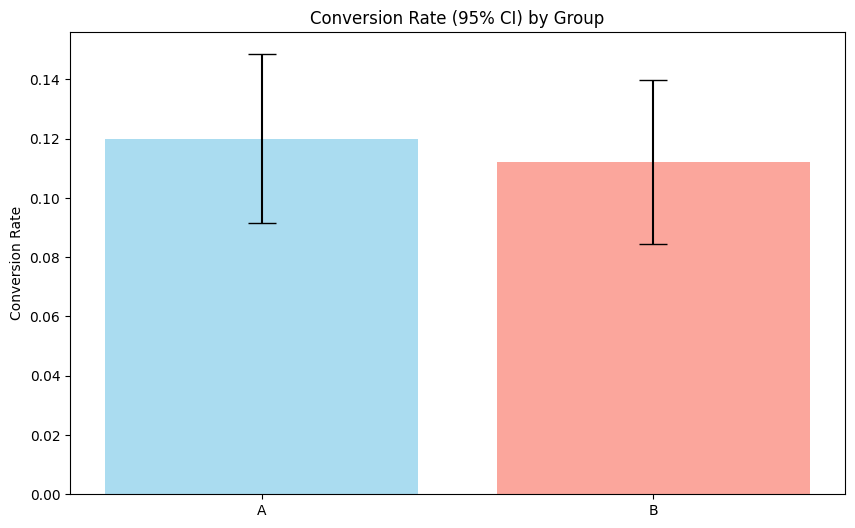

In [9]:
# ✅ **문제 1-4: 그룹별 신뢰구간 시각화하기** 📊
# **🤔 해야할 일:** 막대그래프로 두 그룹의 전환율과 신뢰구간을 그려보세요.
plt.figure(figsize=(10, 6))

# TODO: 그룹명과 전환율 리스트 만들기
groups = ['A', 'B']
rates =  [p_a, p_b]

# TODO: 오차막대 크기 계산 (z_score * 표준오차)
errors = [z_score * se_a, z_score * se_b]

# TODO: 막대그래프 그리기
plt.bar(groups,rates, yerr=errors, width=0.8, capsize=10, alpha=0.7, color=['skyblue', 'salmon'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate (95% CI) by Group')
plt.show()

In [10]:
### ✅ **문제 1-5: 전환율 차이 계산하기** 📊
# **🤔 해야할 일:** B그룹이 A그룹보다 얼마나 더 좋은지 계산해보세요.

# TODO: 전환율 차이 계산 (B - A)
diff = p_b - p_a

# TODO: 차이의 표준오차 계산
# 힌트: 두 독립 비율 차이의 표준오차는 sqrt(se_a^2 + se_b^2)
se_diff = np.sqrt(se_a**2 + se_b**2)

print(f"전환율 차이 (B-A): {diff:.3f}")
print(f"차이의 표준오차: {se_diff:.3f}")

전환율 차이 (B-A): -0.008
차이의 표준오차: 0.020


In [11]:
### ✅ **문제 1-6: 차이의 신뢰구간 계산하기** 🎯
# **🤔 해야할 일:** 전환율 차이의 95% 신뢰구간을 계산해보세요.

# TODO: 차이의 신뢰구간 상하한 계산
ci_diff_lower = diff - 1.96 * se_diff
ci_diff_upper = diff + 1.96 * se_diff

print(f"전환율 차이의 95% 신뢰구간: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

# TODO: 0이 포함되는지 확인하기
if ci_diff_lower > 0:
    print("🎉 B가 A보다 확실히 좋습니다!")
elif ci_diff_upper < 0:
    print("😢 A가 B보다 확실히 좋습니다.")
else:
    print("🤔 확실하지 않습니다.")

전환율 차이의 95% 신뢰구간: [-0.048, 0.032]
🤔 확실하지 않습니다.


"우리는 두 집단의 **전환율 차이의 진짜 값(모수)**가
–4.8%에서 +3.2% 사이에 있을 것이라고 95% 확신한다."

In [12]:
### ✅ **문제 1-7: 경영진 보고서 작성하기** 💼
# **🤔 해야할 일:** 분석 결과를 정리해서 보고서를 만들어보세요.


In [13]:
# TODO: 보고서 완성하기
print("📋 경영진 보고서")
print("="*50)
print(f"🔍 분석 결과:")
print(f"   • A그룹 전환율: {p_a:.1%}")
print(f"   • B그룹 전환율: {p_b:.1%}")
print(f"   • 개선 효과: {diff:.1%}p")
print()
print(f"📊 통계적 신뢰도:")
print(f"   • 개선 효과 범위: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("💡 의사결정:")

# TODO: if문을 사용해서 권장사항 작성하기
# 힌트: ci_diff_lower > 0이면 새 디자인 도입 권장
if ci_diff_lower > 0:
    print("   ✅ 새 디자인(B) 도입을 권장합니다!")
else:
    print("   ❌ 추가 데이터 수집이 필요합니다.")

📋 경영진 보고서
🔍 분석 결과:
   • A그룹 전환율: 12.0%
   • B그룹 전환율: 11.2%
   • 개선 효과: -0.8%p

📊 통계적 신뢰도:
   • 개선 효과 범위: -4.8%p ~ 3.2%p

💡 의사결정:
   ❌ 추가 데이터 수집이 필요합니다.


##[신규 웹사이트 구매버튼 디자인 변경의 유효성 보고서]##
1. 평가 방법: 신규 웹사이트 구매버튼(빨간색)이 기존 웹사이트(파란색) 대비 높은 전환율을 유도 하는지 검증

2. 주요 결과:

|구분                 | Group A(기존)               | Group B(신규) |
| ------------------------ | ---------------------- | ------- |
|샘플 크기              | 500                    | 500     |
|실제 관측된 전환율 | 12.0%                  | 11.2%   |
|전환율 차이      | –0.8 percentage points |         |
|95% 신뢰구간  | (–4.8%, +3.2%)         |         |

3. 평가

  1) 그룹 B에서 더 높은 전환율을 기대했지만 (설정값: 15% vs 12%), 실제 관측된 전환율은 A 그룹이 더 높게 나타남 (A: 12.0%, B: 11.2%).

  2) 전환율 차이에 대한 95% 신뢰구간이 –4.8%에서 +3.2%까지로 나타나며, 0을 포함하고 있음.

  3) 따라서 B 그룹이 A 그룹보다 전환율이 우수하다고 통계적으로 결론내릴 수 없음.
오히려 B가 더 낮은 성과를 보였을 가능성도 있음.

4. 결론
  - 신규 웹사이트의 빨간색 버튼(그룹 B)이 기존 파란색 버튼(그룹 A)보다 전환율 측면에서 더 우수하다는 통계적으로 유의한 근거는 없음.
  - 정식 적용 전, 더 많은 샘플을 활용한 재테스트 또는 디자인 개선 권장

## 📋 미션 2: 연령대별 구매 분석 (t-검정 마스터하기!) 👥

### 🎯 학습 목표

t-검정의 다양한 종류를 실전에서 완벽하게 활용하기

### 📖 배경 스토리

온라인 쇼핑몰에서 "연령대에 따라 구매 패턴이 다를까?" 하는 궁금증이 생겼습니다.

In [14]:
# 온라인 쇼핑몰의 구매 데이터
np.random.seed(789)
ages = np.random.randint(20, 60, 100)
purchase_amounts = 50 + 2*ages + np.random.normal(0, 20, 100)

print("📊 구매 데이터 미리보기")
print(f"연령 범위: {ages.min()}세 ~ {ages.max()}세")
print(f"구매금액 범위: {purchase_amounts.min():.0f}만 원 ~ {purchase_amounts.max():.0f}만 원")
print(f"평균 구매금액: {purchase_amounts.mean():.1f}만 원")

📊 구매 데이터 미리보기
연령 범위: 20세 ~ 59세
구매금액 범위: 39만 원 ~ 208만 원
평균 구매금액: 130.1만 원


In [15]:
### ✅ **문제 2-1: 기본 통계량 계산하기** 🎯
# **🤔 해야할 일:** 일표본 t-검정을 위한 기본 통계량을 계산해보세요.

# TODO: 표본 평균 계산
sample_mean = purchase_amounts.mean()

# TODO: 표본 표준편차 계산
sample_std = purchase_amounts.std(ddof=1)

# TODO: 표본 크기 계산
n = len(purchase_amounts)

# TODO: 비교할 기준값 설정 (업계 기준 150만원)
standard_value = 150

print(f"표본 평균: {sample_mean:.2f}만 원")
print(f"표본 표준편차: {sample_std:.2f}만 원")
print(f"표본 크기: {n}명")
print(f"비교 기준값: {standard_value}만 원")

표본 평균: 130.09만 원
표본 표준편차: 33.90만 원
표본 크기: 100명
비교 기준값: 150만 원


In [16]:
### ✅ **문제 2-2: t-통계량 직접 계산하기** 🧮
# **🤔 해야할 일:** t-검정의 t값을 직접 계산해보세요.

# TODO: t-통계량 공식 사용하기
# 힌트: t = (표본평균 - 기준값) / (표준편차 / sqrt(n))
t_stat = (sample_mean - standard_value) / (sample_std/np.sqrt(n))


print(f"직접 계산한 t-통계량: {t_stat:.3f}")

직접 계산한 t-통계량: -5.874


In [17]:
# 비교를 위해 scipy로도 계산해보기
from scipy.stats import ttest_1samp
t_stat_scipy, p_value = ttest_1samp(purchase_amounts, standard_value)

print(f"scipy로 계산한 t-통계량: {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.4f}")

scipy로 계산한 t-통계량: -5.874
p-value: 0.0000


In [18]:
### ✅ **문제 2-3: 결과 해석하기** 🎯
# **🤔 해야할 일:** p-value를 보고 결과를 해석해보세요.
# TODO: 유의수준 설정
alpha = 0.05

print("🎯 결과 해석")
print("-"*50)
print(f"귀무가설: 고객의 평균 구매금액 = {standard_value}만 원\n대립가설: 고객의 평균 구매금액 ≠ {standard_value}만 원")
print("\n")
# TODO: p-value와 alpha 비교하기
if p_value < alpha:
   print(f"✅ p-value ({p_value:.4f}) < α ({alpha})")
   print("→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.")

  # TODO: 평균이 더 큰지 작은지 확인하기
   if sample_mean > standard_value:
    print(f"→ 우리 고객의 평균 구매 금액은 {sample_mean:.0f}만 원으로, 업계 평균{standard_value}만 원보다 더 많이 구매합니다! 🎉")
   else:
    print(f"→ 우리 고객의 평균 구매 금액은 {sample_mean:.0f}만 원으로, 업계 평균{standard_value}만 원보다 적게 구매합니다. 😅")
else:
  print(f"❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
  print("→ 업계 기준과 유의한 차이가 없습니다.")

🎯 결과 해석
--------------------------------------------------
귀무가설: 고객의 평균 구매금액 = 150만 원
대립가설: 고객의 평균 구매금액 ≠ 150만 원


✅ p-value (0.0000) < α (0.05)
→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.
→ 우리 고객의 평균 구매 금액은 130만 원으로, 업계 평균150만 원보다 적게 구매합니다. 😅


In [19]:
### ✅ **문제 2-4: 연령대별 그룹 나누기** 👥
# **🤔 해야할 일:** 독립표본 t-검정을 위해 데이터를 두 그룹으로 나누세요.

# TODO: 젊은층 데이터 필터링 (20-39세)
young_mask = (ages >= 20) & (ages <= 39)  # Boolean mask : 조건값에 해당하면 True
group1_purchases = purchase_amounts[young_mask]  # "young_mask가 True인 위치의 구매금액만 뽑아라"

# TODO: 중년층 데이터 필터링 (40-59세)
middle_mask = (ages >= 40) & (ages <= 59)
group2_purchases = purchase_amounts[middle_mask]

print("👥 그룹 나누기 결과")
print(f"젊은층 (20-39세): {len(group1_purchases)}명")
print(f"중년층 (40-59세): {len(group2_purchases)}명")

👥 그룹 나누기 결과
젊은층 (20-39세): 47명
중년층 (40-59세): 53명


In [20]:
### ✅ **문제 2-5: 그룹별 기술통계 계산하기** 📊
# **🤔 해야할 일:** 각 그룹의 평균과 표준편차를 계산해보세요.
group1_mean = group1_purchases.mean()
group2_mean = group2_purchases.mean()
group1_std = group1_purchases.std(ddof=1)
group2_std = group2_purchases.std(ddof=1)

print("📊 그룹별 기술통계")
print(f"젊은층 평균: {group1_mean:.1f}만 원 (표준편차: {group1_std:.1f})")
print(f"중년층 평균: {group2_mean:.1f}만 원 (표준편차: {group2_std:.1f})")

# TODO: 평균 차이 계산
diff = group2_mean - group1_mean
print(f"평균 차이: {diff:.1f}만 원")

📊 그룹별 기술통계
젊은층 평균: 106.4만 원 (표준편차: 25.2)
중년층 평균: 151.1만 원 (표준편차: 25.9)
평균 차이: 44.6만 원


In [21]:
### ✅ **문제 2-6: 독립표본 t-검정 실행하기** 🧪
# **🤔 해야할 일:** 두 그룹 간의 차이를 t-검정으로 확인해보세요. (t검정 -> 귀무가설이 옳았을 때의 분포, 두 그룹 간 평균 차이가 통계적으로 유의한지를 검정)

# TODO: 독립표본 t-검정 실행
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group1_purchases, group2_purchases)

print("🧮 t-검정 결과")
print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")


🧮 t-검정 결과
t-통계량: -8.709
p-value: 0.0000


In [22]:
# TODO: 결과 해석하기
alpha = 0.05
print("🎯 비즈니스 해석")
print("-"*50)
print("귀무가설: 젊은층과 중년층의 평균 구매 금액이 같다.\n대립가설: 젊은층과 중년층의 평균 구매 금액이 같지 않다.")
print("\n")
if  p_value < alpha:
    print(f"✅ 두 그룹의 평균 구매금액은 통계적으로 유의한 차이가 있습니다!(p= {p_value:.4f})")

    if group2_mean > group1_mean:
        print(f"→ 중년층의 평균 구매금액은 {group2_mean:.0f}만 원으로, 젊은층보다(평균 구매금액: {group1_mean:.0f}만 원) 더 많이 구매합니다!")
    else:
        print(f"→ 젊은층의 평균 구매금액은 {group1_mean:.0f}만 원으로, 중년층(평균 구매금액: {group2_mean:.0f}만 원)보다 더 많이 구매합니다!")
else:
    print(f"❌ 통계적으로 유의한 차이가 없습니다.(p= {p_value:.4f})")


🎯 비즈니스 해석
--------------------------------------------------
귀무가설: 젊은층과 중년층의 평균 구매 금액이 같다.
대립가설: 젊은층과 중년층의 평균 구매 금액이 같지 않다.


✅ 두 그룹의 평균 구매금액은 통계적으로 유의한 차이가 있습니다!(p= 0.0000)
→ 중년층의 평균 구매금액은 151만 원으로, 젊은층보다(평균 구매금액: 106만 원) 더 많이 구매합니다!


In [23]:
### ✅ **문제 2-7: 등분산성 검정하기** 🔍
# **🤔 해야할 일:** 두 그룹의 분산이 같은지 확인해보세요.

from scipy.stats import levene

# TODO: 분산 직접 비교하기
var1 = group1_purchases.var(ddof=1)
var2 = group2_purchases.var(ddof=1)

print("📊 분산 비교")
print(f"젊은층 분산: {var1:.1f}")
print(f"중년층 분산: {var2:.1f}")

📊 분산 비교
젊은층 분산: 637.1
중년층 분산: 669.5


In [24]:
# TODO: Levene 검정 실행하기
levene_stat, levene_p = levene(group1_purchases, group2_purchases)

print("🧪 Levene 등분산성 검정")
print(f"p-value: {levene_p:.4f}")
print("\n")
# TODO: 등분산성 판단하기
print("귀무가설: 두 그룹의 분산이 같다.\n대립가설: 두 그룹의 분산이 같지 않다.")
print("\n")
if levene_p >= 0.05:
    print(f"✅ 귀무가설을 채택한다 -> 등분산성 가정 만족(p={levene_p:.4f})")
else:
    print("❌ 귀무가설 기각한다 -> 등분산성 가정 위배p={levene_p:.4f})")

🧪 Levene 등분산성 검정
p-value: 0.8106


귀무가설: 두 그룹의 분산이 같다.
대립가설: 두 그룹의 분산이 같지 않다.


✅ 귀무가설을 채택한다 -> 등분산성 가정 만족(p=0.8106)


## 📋 미션 3: 직원 만족도 종합 분석 🏢

### 🎯 학습 목표

상관관계, 회귀분석, 로지스틱 회귀를 실전에서 종합적으로 활용하기

In [25]:
# 직원 만족도 종합 데이터 생성
np.random.seed(2024)
n = 250

data_hr = {
    'salary': np.random.lognormal(np.log(50000), 0.3, n),
    'years_at_company': np.random.exponential(3, n),
    'department': np.random.choice(['sales', 'dev', 'marketing', 'hr'], n, p=[0.3, 0.4, 0.2, 0.1]),
    'training_hours': np.random.gamma(2, 10, n),
    'position': np.random.choice(['staff', 'assistant', 'manager', 'director'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# 만족도 점수 (1-10점) 생성
satisfaction_base = (
    df_hr['salary']/10000 * 0.8 +
    df_hr['years_at_company'] * 0.3 +
    df_hr['training_hours'] * 0.1
)

dept_effect = df_hr['department'].map({'sales': -0.5, 'dev': 0.8, 'marketing': 0.3, 'hr': 0.0})
rank_effect = df_hr['position'].map({'staff': 0, 'assistant': 0.5, 'manager': 1.0, 'director': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

In [26]:
df_hr.head()

,salary,years_at_company,department,training_hours,position
0,82470.215328,5.843045,dev,4.431883,manager
1,62378.915363,1.803688,dev,1.373603,assistant
2,47066.508609,0.211051,marketing,17.196300,manager
3,47786.798588,4.785220,dev,49.198119,manager
4,65814.392648,2.060981,sales,18.363062,staff


In [27]:
satisfaction_base.head()

,0
0,8.793719
1,5.668780
2,5.548266
3,10.178322
4,7.719752


In [28]:
dept_effect.head()

,department
0,0.8
1,0.8
2,0.3
3,0.8
4,-0.5


In [29]:
rank_effect.head()

,position
0,1.0
1,0.5
2,1.0
3,1.0
4,0.0


In [30]:
# 이직 의향
turnover_prob = 1 / (1 + np.exp(satisfaction - 5))
turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['satisfaction'] = satisfaction.round(1)
df_hr['turnover_intent'] = turnover_intent

print("📊 직원 만족도 데이터 (처음 5개 행)")
print(df_hr.head())

📊 직원 만족도 데이터 (처음 5개 행)
         salary  years_at_company department  training_hours   position  \
0  82470.215328          5.843045        dev        4.431883    manager   
1  62378.915363          1.803688        dev        1.373603  assistant   
2  47066.508609          0.211051  marketing       17.196300    manager   
3  47786.798588          4.785220        dev       49.198119    manager   
4  65814.392648          2.060981      sales       18.363062      staff   

   satisfaction  turnover_intent  
0          10.0                0  
1           8.2                0  
2           7.6                0  
3          10.0                0  
4           9.1                0  


In [31]:
### ✅ **문제 3-1: 상관관계 매트릭스 만들기** 🔍
# **🤔 해야할 일:** 숫자형 변수들 간의 상관관계를 확인해보세요.
df_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            250 non-null    float64
 1   years_at_company  250 non-null    float64
 2   department        250 non-null    object 
 3   training_hours    250 non-null    float64
 4   position          250 non-null    object 
 5   satisfaction      250 non-null    float64
 6   turnover_intent   250 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 13.8+ KB


In [32]:
# TODO: 숫자형 변수들만 선별하기
numeric_cols = ['salary', 'years_at_company', 'training_hours', 'satisfaction', 'turnover_intent']
correlation_data = df_hr[numeric_cols]

# TODO: 상관계수 매트릭스 계산하기
correlation_matrix = correlation_data.corr()

print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))

📊 상관계수 매트릭스
                  salary  years_at_company  training_hours  satisfaction  \
salary             1.000             0.101          -0.003         0.567   
years_at_company   0.101             1.000          -0.062         0.389   
training_hours    -0.003            -0.062           1.000         0.484   
satisfaction       0.567             0.389           0.484         1.000   
turnover_intent   -0.265            -0.130          -0.276        -0.534   

                  turnover_intent  
salary                     -0.265  
years_at_company           -0.130  
training_hours             -0.276  
satisfaction               -0.534  
turnover_intent             1.000  


In [33]:
### ✅ **문제 3-2: 만족도와의 상관관계 분석하기** 🎯
# **🤔 해야할 일:** 어떤 변수가 만족도와 가장 관련이 높은지 찾아보세요.

# TODO: 만족도와의 상관관계만 추출하기
satisfaction_corr = correlation_matrix['satisfaction'].sort_values(ascending=False)

print("🎯 만족도와의 상관관계 (높은 순)")

# TODO: for문으로 각 변수별 상관관계 출력하기
for var, corr in satisfaction_corr.items():
    if var != 'satisfaction':  # 만족도 자기 자신 제외
        # TODO: 상관관계 강도 판단하기
        if abs(corr) > 0.5:
            strength = "strong"
        elif abs(corr) > 0.3:
            strength = "moderate"
        else:
            strength = "weak"

        direction = "positive" if corr > 0 else "negative"
        print(f"• {var}: {corr:.3f} ({strength} {direction} correlation)")


🎯 만족도와의 상관관계 (높은 순)
• salary: 0.567 (strong positive correlation)
• training_hours: 0.484 (moderate positive correlation)
• years_at_company: 0.389 (moderate positive correlation)
• turnover_intent: -0.534 (strong negative correlation)


In [83]:
satisfaction_corr

,satisfaction
satisfaction,1.000000
salary,0.566789
training_hours,0.484434
years_at_company,0.388998
turnover_intent,-0.533701


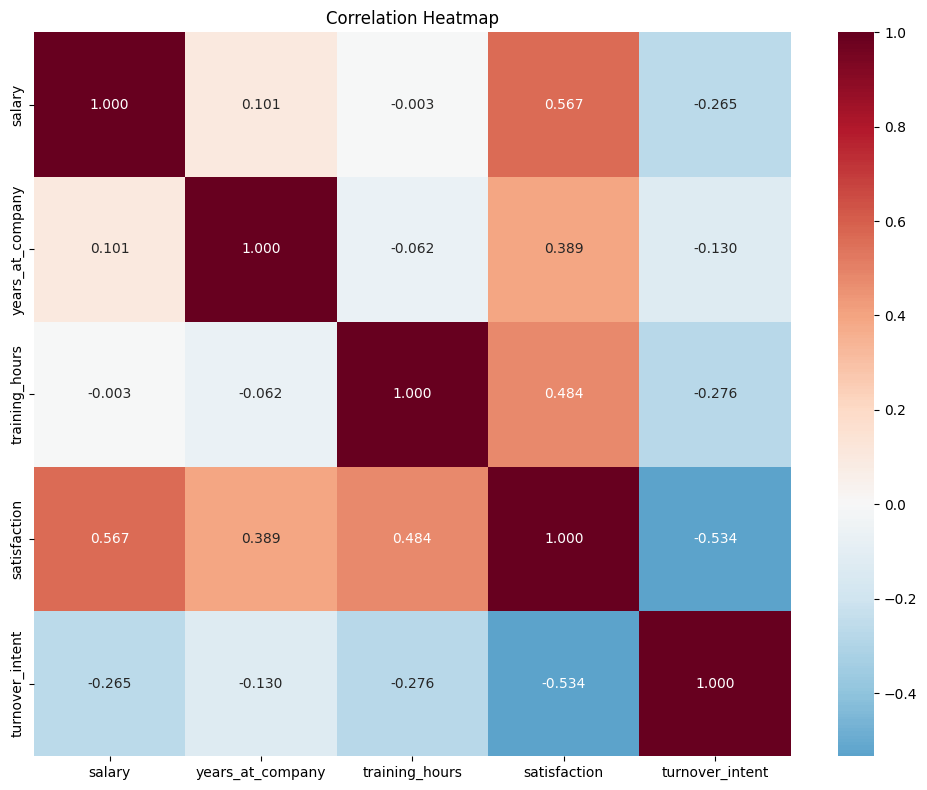

In [34]:
### ✅ **문제 3-3: 상관관계 히트맵 그리기** 📈
# **🤔 해야할 일:** 상관관계를 시각적으로 표현해보세요.

# TODO: 히트맵 그리기
plt.figure(figsize=(10, 8))

# TODO: seaborn heatmap 사용하기
# 힌트: sns.heatmap(data, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')  # 빈칸을 채우세요

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()




In [35]:
### ✅ **문제 3-4: 부서별 만족도 비교하기** 🏢
# **🤔 해야할 일:** 부서별로 만족도와 이직의향을 비교해보세요.

# TODO: 부서별 그룹화해서 평균 계산하기
dept_summary = df_hr.groupby('department')['satisfaction'].mean()
print("🏢 부서별 평균 만족도")
print(dept_summary.round(2))

# TODO: 부서별 이직의향도 계산하기
dept_turnover = df_hr.groupby('department')['turnover_intent'].mean()
print("\n🏢 부서별 이직의향")
print(dept_turnover.round(3))

🏢 부서별 평균 만족도
department
dev          7.76
hr           6.93
marketing    7.82
sales        6.96
Name: satisfaction, dtype: float64

🏢 부서별 이직의향
department
dev          0.139
hr           0.278
marketing    0.208
sales        0.276
Name: turnover_intent, dtype: float64


In [36]:
# TODO: for문으로 부서별 상세 분석 출력하기
print("\n📋 부서별 상세 분석")
for dept in df_hr['department'].unique():
    # TODO: 해당 부서 데이터만 필터링하기
    dept_data =  df_hr[df_hr['department'] == dept]

    satisfaction_avg = dept_data['satisfaction'].mean()
    turnover_avg = dept_data['turnover_intent'].mean()

    print(f"• {dept} dept.: 만족도 {satisfaction_avg:.1f}점, 이직의향 {turnover_avg:.1%}")


📋 부서별 상세 분석
• dev dept.: 만족도 7.8점, 이직의향 13.9%
• marketing dept.: 만족도 7.8점, 이직의향 20.8%
• sales dept.: 만족도 7.0점, 이직의향 27.6%
• hr dept.: 만족도 6.9점, 이직의향 27.8%


In [37]:
### ✅ **문제 3-5: 더미 변수 생성하기** 🔧
# **🤔 해야할 일:** 회귀분석을 위해 범주형 변수를 더미 변수로 변환하세요.

# TODO: 부서/직급 더미 변수로 변환하기
dept_dummies = pd.get_dummies(df_hr['department'], prefix='dept')
rank_dummies = pd.get_dummies(df_hr['position'], prefix='position')

# TODO: 기준 카테고리 제거하기 (다중공선성 방지)
dept_dummies = dept_dummies.drop('dept_hr', axis=1)
rank_dummies = rank_dummies.drop('position_assistant', axis=1)

print("생성된 더미 변수들:")
print("department:", list(dept_dummies.columns))
print("position:", list(rank_dummies.columns))


생성된 더미 변수들:
department: ['dept_dev', 'dept_marketing', 'dept_sales']
position: ['position_director', 'position_manager', 'position_staff']


In [38]:
### ✅ **문제 3-6: 회귀분석용 데이터 준비하기** 🔧
# **🤔 해야할 일:** 독립변수와 종속변수를 준비하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: 독립변수 데이터프레임 만들기
X_vars = pd.concat([df_hr, dept_dummies, rank_dummies], axis=1)

# TODO: 종속변수 데이터프레임 만들기
y_var = df_hr['satisfaction']
# 힌트: df_hr[['연봉', '근무연수', '교육시간']]과 더미변수들을 합치세요
X_vars =  X_vars.drop(columns=['satisfaction', 'turnover_intent', 'department', 'position'])

print("🔧 회귀분석 변수 구성")
print(f"독립변수 개수: {len(X_vars.columns)}개")
print(f"독립변수: {list(X_vars.columns)}")
print(f"종속변수: satisfaction")


🔧 회귀분석 변수 구성
독립변수 개수: 9개
독립변수: ['salary', 'years_at_company', 'training_hours', 'dept_dev', 'dept_marketing', 'dept_sales', 'position_director', 'position_manager', 'position_staff']
종속변수: satisfaction


In [39]:
### ✅ **문제 3-7: 회귀분석 실행하기** 📊
# **🤔 해야할 일:** 다중회귀분석을 실행하고 R²을 계산하세요.

# TODO: 회귀모델 생성 및 학습하기
model = LinearRegression()
model.fit(X_vars, y_var)

LinearRegression()

In [40]:
# TODO: 예측값 계산하기
y_pred = model.predict(X_vars)

# TODO: R² 계산하기
r2 = r2_score(y_var, y_pred)

print("📊 다중회귀분석 결과")
print(f"R² (설명력): {r2:.3f} ({r2*100:.1f}%)")


📊 다중회귀분석 결과
R² (설명력): 0.800 (80.0%)


In [41]:
### ✅ **문제 3-8: 회귀계수 해석하기** 🔍
# **🤔 해야할 일:** 어떤 변수가 만족도에 가장 큰 영향을 미치는지 찾아보세요.

# TODO: 회귀계수를 데이터프레임으로 정리하기
coefficients = pd.DataFrame({
    '변수':  X_vars.columns,
    '계수':  model.coef_,
    '절댓값': np.abs(model.coef_)
})

# TODO: 절댓값 기준으로 정렬하기
coefficients = coefficients.sort_values('절댓값', ascending=False)

print("🔍 회귀계수 분석 (영향력 순)")
print(coefficients.head(5))  # 상위 5개만 출력

# TODO: 가장 영향력이 큰 변수 찾기
most_important = coefficients.iloc[0]
print(f"\n💡가장 영향력이 큰 변수: {most_important['변수']} (계수: {most_important['계수']:.3f})")


🔍 회귀계수 분석 (영향력 순)
                  변수        계수       절댓값
6  position_director  1.068096  1.068096
3           dept_dev  0.497000  0.497000
5         dept_sales -0.496424  0.496424
7   position_manager  0.438483  0.438483
8     position_staff -0.325535  0.325535

💡가장 영향력이 큰 변수: position_director (계수: 1.068)


In [42]:
### ✅ **문제 3-9: 로지스틱 회귀 데이터 준비하기** 🎯
# **🤔 해야할 일:** 이직 의향을 예측하기 위한 로지스틱 회귀를 준비하세요.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TODO: 로지스틱 회귀용 독립변수와 종속변수 설정하기
X_logistic =  X_vars
y_logistic = df_hr['turnover_intent']


# TODO: 현재 이직 의향 현황 파악하기
turnover_summary = df_hr['turnover_intent'].value_counts()
turnover_rate = df_hr['turnover_intent'].mean()


print("📊 현재 이직 의향 현황")
print(f"이직 의향 있음: {turnover_summary[1]}명 ({turnover_rate:.1%})")
print(f"이직 의향 없음: {turnover_summary[0]}명 ({1-turnover_rate:.1%})")

📊 현재 이직 의향 현황
이직 의향 있음: 51명 (20.4%)
이직 의향 없음: 199명 (79.6%)


In [43]:
### ✅ **문제 3-10: 로지스틱 회귀 모델 학습하기** 🤖
# **🤔 해야할 일:** 로지스틱 회귀 모델을 학습시키고 예측을 수행하세요.

# TODO: 로지스틱 회귀 모델 생성하기
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_logistic, y_logistic)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# TODO: 이직 확률 예측하기
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]

# TODO: 이직 여부 예측하기 (0 또는 1)
y_pred_class = logistic_model.predict(X_logistic)

# TODO: 정확도 계산하기
accuracy = (y_pred_class == y_logistic).mean()

print("🤖 로지스틱 회귀 모델 성능")
print(f"정확도: {accuracy:.3f}")

🤖 로지스틱 회귀 모델 성능
정확도: 0.860


In [45]:
### ✅ **문제 3-11: 혼동 행렬 만들기** 📋
# **🤔 해야할 일:** 모델의 예측 성능을 자세히 분석해보세요.
# TODO: 혼동 행렬 계산하기
cm = confusion_matrix(y_logistic, y_pred_class)

print("📋 혼동 행렬")
print("실제 → 예측    이직안함  이직함")
print(f"이직 안함        {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"이직 함          {cm[1,0]:3d}    {cm[1,1]:3d}")

📋 혼동 행렬
실제 → 예측    이직안함  이직함
이직 안함        193      6
이직 함           29     22


In [46]:
# TODO: 정밀도와 재현율 계산하기
# 정밀도 = TP / (TP + FP) - 예측한 것 중 진짜 이직 의향 비율
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

# 재현율 = TP / (TP + FN) - 실제 이직자 중 예측에 잡힌 비율
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\n정밀도: {precision:.3f}")
print(f"재현율: {recall:.3f}")


정밀도: 0.786
재현율: 0.431


In [71]:
### ✅ **문제 3-12: 오즈비 계산하기** 📈
# **🤔 해야할 일:** 각 변수가 이직 확률에 미치는 영향을 분석하세요.
# TODO: 오즈비 계산하기
# 힌트: 오즈비 = exp(회귀계수)

odds_ratios = np.exp(logistic_model.coef_[0])

# TODO: 오즈비 분석 데이터프레임 만들기
odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화': [(or_val - 1) * 100 for or_val in odds_ratios]
})

# TODO: 위험도 변화가 큰 순으로 정렬하기
odds_analysis = odds_analysis.sort_values('위험도변화', key=abs, ascending=False)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())


🎯 이직 위험 요인 분석 (상위 5개)
                  변수        계수       오즈비       위험도변화
8     position_staff  0.742447  2.101071  110.107109
5         dept_sales  0.572189  1.772141   77.214141
3           dept_dev -0.553542  0.574910  -42.508994
7   position_manager -0.490218  0.612493  -38.750706
6  position_director -0.476632  0.620871  -37.912920


In [50]:
odds_analysis.head()

,변수,계수,오즈비,위험도변화
8,position_staff,0.742447,2.101071,110.107109
5,dept_sales,0.572189,1.772141,77.214141
3,dept_dev,-0.553542,0.574910,-42.508994
7,position_manager,-0.490218,0.612493,-38.750706
6,position_director,-0.476632,0.620871,-37.912920


In [73]:
### ✅ **문제 3-13: 고위험군 식별하기** 🚨
# **🤔 해야할 일:** 이직 확률이 높은 직원들을 찾아보세요.
# TODO: 고위험군 기준 설정하기 (70% 이상)
high_risk_threshold = 0.7

# TODO: 고위험군 직원 필터링하기
high_risk_mask = y_pred_proba > high_risk_threshold
high_risk_employees = df_hr[high_risk_mask]

print(f"🎯 이직 고위험군 식별")
print(f"이직 확률 {high_risk_threshold:.0%} 이상 직원: {len(high_risk_employees)}명")

if len(high_risk_employees) > 0:
    print("고위험군 특징:")
    # TODO: 고위험군의 평균 만족도 계산하기
    avg_satisfaction = high_risk_employees['satisfaction'].mean()

    # TODO: 고위험군의 평균 연봉 계산하기
    avg_salary = high_risk_employees['salary'].mean()

    print(f"• 평균 만족도: {avg_satisfaction:.1f}점")
    print(f"• 평균 연봉: {avg_salary/10000:.0f}만원")

🎯 이직 고위험군 식별
이직 확률 70% 이상 직원: 12명
고위험군 특징:
• 평균 만족도: 3.9점
• 평균 연봉: 3만원


In [102]:
### ✅ **문제 3-14: 최종 권고안 작성하기** 💼
# **🤔 해야할 일:** 분석 결과를 바탕으로 CEO 보고서를 작성하세요.

print("📋 CEO 보고서: 직원 만족도 및 이직 방지 전략")
print("=" * 60)

# TODO: 현황 요약 작성하기
print("\n📊 현황 요약")
print(f"• 전체 직원 만족도: {df_hr['satisfaction'].mean():.1f}/10점")
print(f"• 현재 이직 의향률: {df_hr['turnover_intent'].mean():.1%}")
print(f"• 고위험군: {len(high_risk_employees)}명")

# TODO: 부서별 위험도 분석하기
print("\n🏢 부서별 위험도 분석")
dept_risk = df_hr.groupby('department')['turnover_intent'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {dept}부: 이직률 {risk:.1%} (위험도: {level})")

print("\n🏢 직급별 위험도 분석")
position_risk = df_hr.groupby('position')['turnover_intent'].mean().sort_values(ascending=False)

for position, risk in position_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {position}직급: 이직률 {risk:.1%} (위험도: {level})")


# TODO: 핵심 발견사항 정리하기
print(f"\n💡 핵심 발견사항")
most_important_factor = coefficients.iloc[0]
print(f"1️⃣ 만족도에 가장 큰 영향: {most_important_factor['변수']}")

print(f"\n2️⃣직급에 따른 이직 확률 예측")
print(f"✔️staff 직급 약 {odds_analysis.loc[8,'위험도변화']:.0f}% 이직 확률이 높은 것으로 예측됨")
print(f"✔️manager 직급 약 {odds_analysis.loc[7,'위험도변화']:.0f}%, director 직급 약 {odds_analysis.loc[6,'위험도변화']:.0f}% 이직 확률이 낮은 것으로 예측됨")
print(f"\n3️⃣부서에 따른 이직 확률 예측")
print(f"✔️sales부서 약 {odds_analysis.loc[5,'위험도변화']:.0f}% 이직 확률이 높은 것으로 예측됨")
print(f"✔️development 부서는 {odds_analysis.loc[3,'위험도변화']:.0f}% 이직 확률이 낮은 것으로 예측됨.")

# TODO: 권장 액션 플랜 작성하기
print(f"\n🎯 권장 액션 플랜")
highest_risk_dept = dept_risk.index[0]  # 가장 위험한 부서
highest_risk_posision = position_risk.index[0]  # 가장 위험한 직급
print(f"🚨 즉시 조치 필요: {highest_risk_dept}부와 {highest_risk_posision} 직급 집중, 추가로 잠재 이직 위험도가 높은 sales부도 포함하는 것 제안")
print(f"💰 투자 우선순위: 만족도 개선 프로그램")
highest_satisfaction = satisfaction_corr.index[1]
second_highest_satisfaction = satisfaction_corr.index[2]
print(f"✔️{highest_satisfaction}를 높일 수 있는 보상체계 개선 \n✔️{second_highest_satisfaction} 프로그램 확대 운영")
print(f"📊 모니터링: 월별 만족도 조사 실시")


📋 CEO 보고서: 직원 만족도 및 이직 방지 전략

📊 현황 요약
• 전체 직원 만족도: 7.5/10점
• 현재 이직 의향률: 20.4%
• 고위험군: 12명

🏢 부서별 위험도 분석
🟡 hr부: 이직률 27.8% (위험도: 보통)
🟡 sales부: 이직률 27.6% (위험도: 보통)
🟡 marketing부: 이직률 20.8% (위험도: 보통)
🟢 dev부: 이직률 13.9% (위험도: 낮음)

🏢 직급별 위험도 분석
🟡 staff직급: 이직률 30.0% (위험도: 보통)
🟡 assistant직급: 이직률 15.3% (위험도: 보통)
🟢 manager직급: 이직률 14.0% (위험도: 낮음)
🟢 director직급: 이직률 10.7% (위험도: 낮음)

💡 핵심 발견사항
1️⃣ 만족도에 가장 큰 영향: position_director

2️⃣직급에 따른 이직 확률 예측
✔️staff 직급 약 110% 이직 확률이 높은 것으로 예측됨
✔️manager 직급 약 -39%, director 직급 약 -38% 이직 확률이 낮은 것으로 예측됨

3️⃣부서에 따른 이직 확률 예측
✔️sales부서 약 77% 이직 확률이 높은 것으로 예측됨
✔️development 부서는 -43% 이직 확률이 낮은 것으로 예측됨.

🎯 권장 액션 플랜
🚨 즉시 조치 필요: hr부와 staff 직급 집중, 추가로 잠재 이직 위험도가 높은 sales부도 포함하는 것 제안
💰 투자 우선순위: 만족도 개선 프로그램
✔️salary를 높일 수 있는 보상체계 개선 
✔️training_hours 프로그램 확대 운영
📊 모니터링: 월별 만족도 조사 실시
